## <font color = blue>**1. What is Unsupervised Machine Learning?**</font>

Unsupervised Machine Learning is generally used for 'Clustering'. Clustering is a term which basically means grouping the
data into different segments/clusters/groups.

**In Unsupervised Machine Learning, we don't have 'y'(dependent variable), we have only 'x' (independent variable).
At the end of Unsupervised Machine Learning, 'y' is something that we have to generate through our findings and add it to the final dataframe with 'x'.**




## <font color = blue>**2. What is K-means clustering?**</font>

K-means custering is an algorithm where 'k' denotes the number of clusters of unlabelled data 'x' formed after performing
Within Cluster Sum of Squares (WCSS).


## <font color = blue>**3. What is Within Cluster Sum of Squares (WCSS)?**</font>

WCSS or Within Cluster Sum of Squares is a method in which the algorithm starts with considering the entire data as one
single cluster and it computes the WCSS value based on Euclidean distance and centroid.

Initailly for a single cluster, the distance between any two given points within the data is uneven. This is so because
data points belonging to one class would be closer to that class and farther from others. This uneven distribution of data
points will lead to a high WCSS value.

So then we start increasing the clusters by increasing the value of 'k', as we go increasing the value of 'k' more
clusters will be formed which will eventually reduce the uneven distance between two farthest points. Visualize it as,
multiple clusters will have data points closer to each other. This will reduce the WCSS value.

While doing so, we will eventually reach a point beyond which the value of WCSS would not drop much or one can say would
reach a saturation. This point would be known as 'elbow point'. The value of 'k' at elbow point will give us the optimum
number of clusters.

Look at the diagram below, to understand it more better.


In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving WCSS.png to WCSS.png


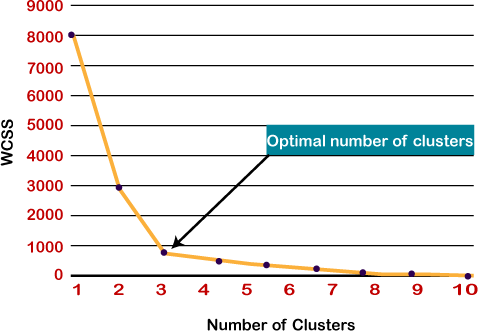

In [3]:
Image('WCSS.png')

To understand how WCSS decreases with clustering look at the image below:

In [4]:
uploaded = files.upload()

Saving Cluster.png to Cluster.png


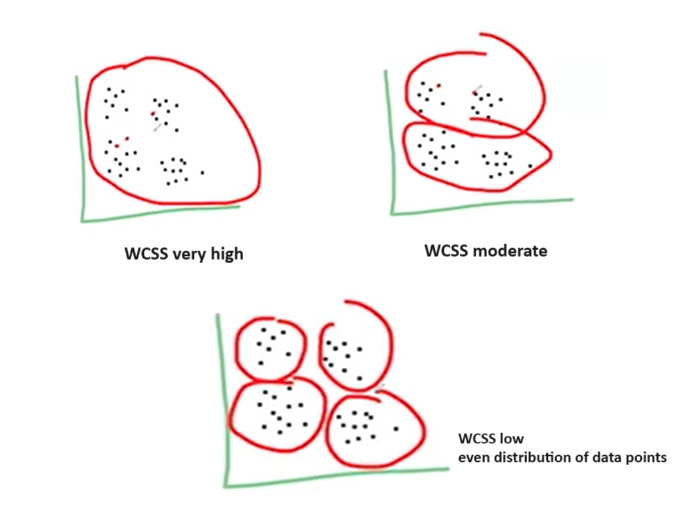

In [6]:
Image('Cluster.png')

## **Code**

## <font color = blue>1. Importing Libraries</font>

Let us import the necessary libraries first.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <font color = blue>2. Reading the data</font>

Let us read the data now. Our task here is to perform Customer clustering/ Customer segmentation based on the Mall customers data below. So our job is to find how many clusters would be the consumers get divided into. This will help us to extract consumers with a high income and spending score.

In [ ]:
# Reading the data
data = pd.read_csv("Mall_Customers.csv",index_col=0)

In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
# Checking the dimensions
data.shape

(200, 4)

## <font color = blue>3. Null value check</font>

Let us check if we have any null values in our data.

In [ ]:
# Check for null values
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## <font color = blue>4. Mapping categorical columns</font>

'Gender' column in the dataset is categorical. Let us map the genders. Here, we have not used Label Encoder for mapping.
Since we have only 2 genders to map, we are manually mapping them using 'data.col_name.map()' function.

Now important thing to consider here is, in any other scenario we could have mapped one of the Genders as 0 and other as 1.
However for this dataset, 'Gender' column is not relevant in clustering the consumers. For us, clustering of customers
does not depend on Gender but the 'Annual Income' & 'Spending Score'. Hence in order to remove the influence of 'Gender'
we are mapping Male and Female both as '0'.

In [ ]:
# mapping categorical column gender, so
data['Gender'] = data.Gender.map({'Female':0,"Male":0})

We can check the data type (dtype) of the data to see if it mapped as an integer or not.

In [ ]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

Let us see how our data looks like after mapping.

In [ ]:
data.head(200)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,0,32,126,74


## <font color = blue>5. Splitting relevant columns in X</font>

As mentioned earlier only the columns 'Annual Income (k$)' & 'Spending Score (1-100)' are going to
go ahead and decide how consumer clustering should be done. So let us split those columns in X with the help of slicing.

In [ ]:
# Condidering the last 2 columns
X= data.values[:,[2,3]]

Let us print 'X' now

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## <font color = blue>6. Applying k-means clustering</font>

In the code below, we are first importing 'KMeans' from sklearn's cluster sub-library

We start with defining a blank wsse list.

For each value of cluster from k= 1 to 10, it will apply kmeans and fit the data on X-------(X axis-value)

At every iteration, it will append the 'kmeans.interia_' or the 'wcss' value in the blank list. ------(Y- axis value)

After this we plot the X-axis value (k value) for the range 1-10 and Y-axis (kmeans.interia_ value or wcss value)
as a plot.

random state = 10 will choose any random value during iteration and n_clusters=i will do the clustering till ith number.

C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'WCSS')

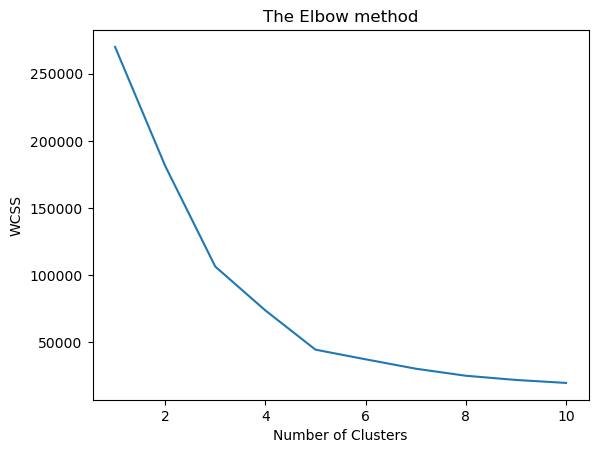

In [ ]:
# Performing clustering using KMeans
from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Looking at the graph above, we notice a saturation in wcss value after k = 5. So here k =5 is the optimum
clusters and we can predict accurate values on k=5. So let us move on to prediction.

## <font color = blue>7. Predicting y_pred based on X</font>

As mentioned before, let us fix our clusters to 5 and predict Y_pred based on X.

In [ ]:
# Finding the value of clusters using elbow point above and using thatto predict Y
kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X)

C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

The prediction here is based on 5 clusters/5 classes and hence we get 0,1,2,3 & 4 as output.

## <font color = blue>8. Constructing a dataframe</font>

Now let us add Y_pred as a column 'clusters' in the final dataframe to check customer segmentation.

In [ ]:
#Constructing a dataframe and adding Y_pred and labelling it as clusters
data['clusters']= Y_pred
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,3
2,0,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3
6,0,22,17,76,0
7,0,35,18,6,3
8,0,23,18,94,0
9,0,64,19,3,3


## <font color = blue>9. EDA</font>

Let us do EDA (Exploratory Data Analysis) to visualize the customer segmentation properly.

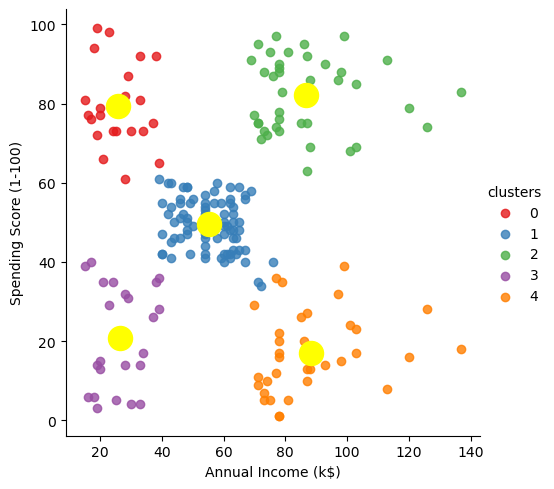

In [ ]:
sns.lmplot(data=data, x= 'Annual Income (k$)',y = 'Spending Score (1-100)',
         fit_reg =False,
         hue = "clusters", palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 300, c= 'yellow')
plt.show()

From the above diagram we could visually see different clusters. To interpret the image above, the
cluster with higher spending scores and higher income should be the Target customers while
those with lower spending scores and lower income could be categorised as careless customers.

Customer segmentation with k means helps the company to focus on a specific group of customers
based on the way they spend on a product or based on the utility of a customers towards their product.

Now let us assign labels to the generated clusters using mapping.

In [ ]:
data['clusters']= data.clusters.map({0:'standard', 1: 'sensible', 2: 'careless', 3: 'Target', 4: 'careful'})

In [ ]:
data_new = data[data['clusters']=='Target']

In [ ]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,Target
3,0,20,16,6,Target
5,0,31,17,40,Target
7,0,35,18,6,Target
9,0,64,19,3,Target
11,0,67,19,14,Target
13,0,58,20,15,Target
15,0,37,20,13,Target
17,0,35,21,35,Target


## <font color = blue>10. Exporting the excel file</font>

We can then further export the data file in excel format to save the results as a spreadsheet.

In [ ]:
data_new.to_excel(r'finaldata.xlsx', index= True)